# **Redes Convolucionales**
### Por **Josmar Dominguez** (16-10315)

## Data management
Este notebook se encarga de cargar los datos de CIFAR100 y de hacer el preprocesamiento necesario para poder ser usados en las redes convolucionales.
Además, se incluyen las funciones para hacer data augmentation, y así poder mejorar el desempeño de los modelos.

#### **Importación de librerías**
* El dataset se importa desde ````torchvision.datasets````.
* Para la visualización de las imágenes se usa ````matplotlib.pyplot````.
* Para el análisis de datos se usa ````numpy````
* Para la data augmentation se usa ````torchvision.transforms````

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#### **Carga y visualización del dataset**
Se procede a cargar el datset y a visualizar algunas imágenes de ejemplo, además, verificar el tamaño de la data, y de las imágenes.

In [2]:
train_data = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())

dict_labels = train_data.class_to_idx
dict_ids = {v: k for k, v in dict_labels.items()}

Files already downloaded and verified
Files already downloaded and verified


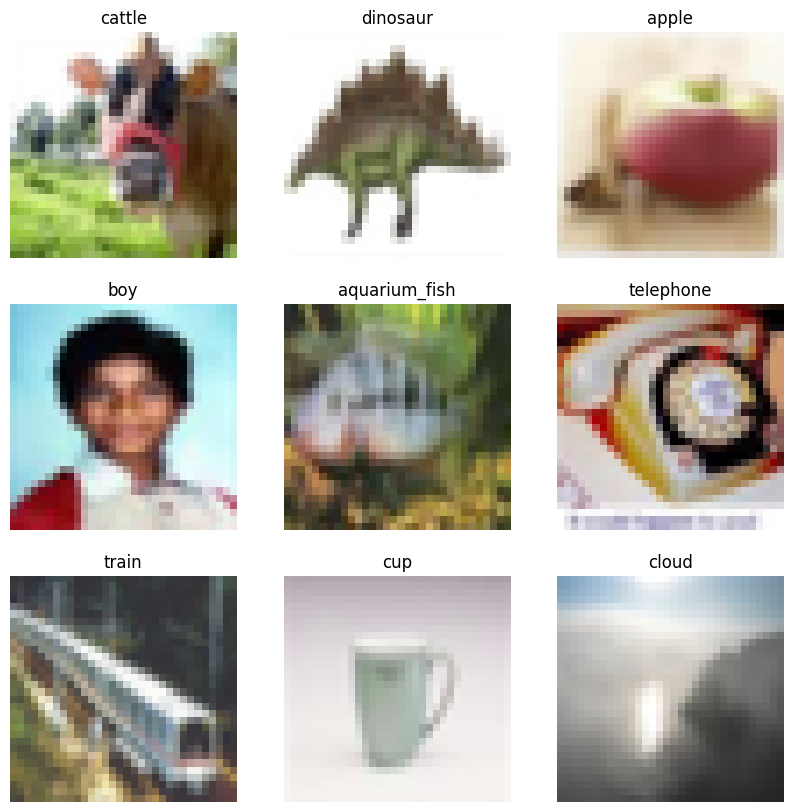

In [3]:
# Visulize 3 x 3 grid of images from the dataset
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    ax[i // 3][i % 3].imshow(train_data[i][0].permute(1, 2, 0))
    ax[i // 3][i % 3].set_title(dict_ids[train_data[i][1]])
    ax[i // 3][i % 3].axis("off")
plt.show()

#### **Radiografía del dataset**
Determinar el tamaño de cada dataset, el número de clases, y el número de imágenes por clase.

In [4]:
# Print the number of images in the training and test datasets
print(f'Number of training images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

# Print the number of classes in the training and test datasets
print(f'Number of classes: {len(dict_labels)}')

# Print the shape of the training and test images
print(f'Shape of training images: {train_data[0][0].shape}')
print(f'Shape of test images: {test_data[0][0].shape}')

Number of training images: 50000
Number of test images: 10000
Number of classes: 100
Shape of training images: torch.Size([3, 32, 32])
Shape of test images: torch.Size([3, 32, 32])


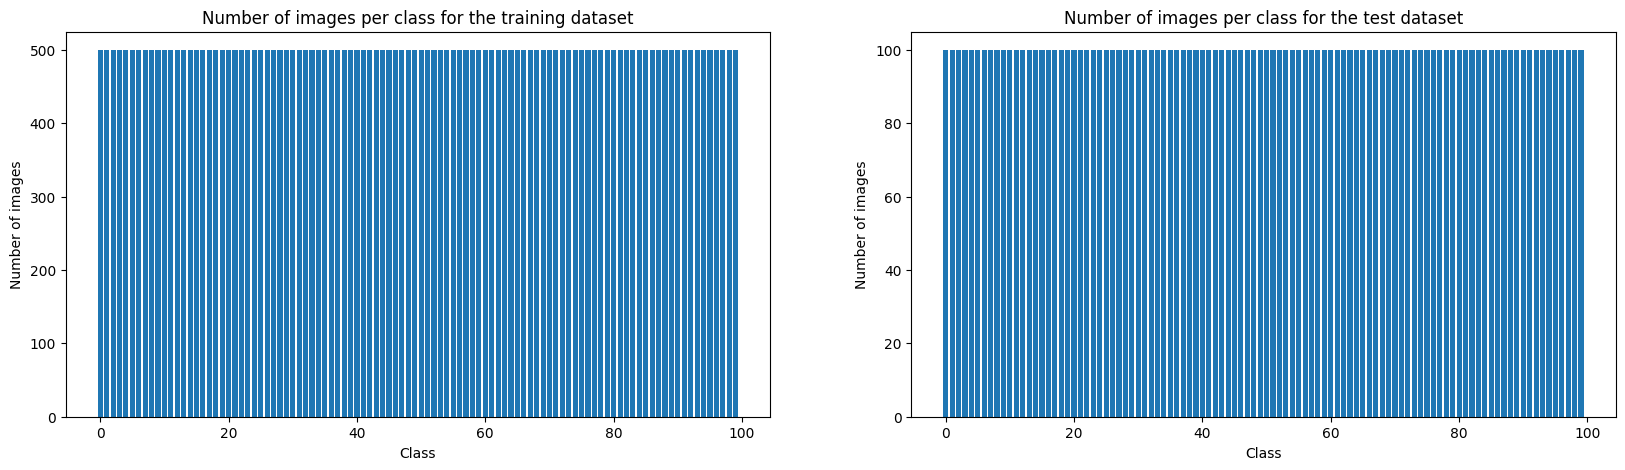

Mean of training images: 500.0
Standard deviation of training images: 0.0


In [5]:
import numpy as np

imgs_class_train = np.bincount(train_data.targets, minlength=len(dict_labels))
imgs_class_test = np.bincount(test_data.targets, minlength=len(dict_labels))

# Plot the number of images per class for the training and test datasets
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].bar(list(dict_ids.keys()), imgs_class_train)
ax[0].set_title('Number of images per class for the training dataset')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of images')
ax[1].bar(list(dict_ids.keys()), imgs_class_test)
ax[1].set_title('Number of images per class for the test dataset')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of images')
plt.show()

# Print the mean and standard deviation of the training images
print(f'Mean of training images: {imgs_class_train.mean()}')
print(f'Standard deviation of training images: {imgs_class_train.std()}')

Por lo que se observa que hay 500 imágnees por cada clase en el dataset de entrenamiento, y 100 imágenes por cada clase en el dataset de validación.

#### **Data augmentation**
Se procede a hacer data augmentation sobre el dataset de entrenamiento, para así poder mejorar el desempeño de los modelos. Se hacen flips horizontales, random crops y cambios de brillo.
Se aumenta el tamaño del dataset de entrenamiento de 50.000 a 100.000 imágenes.

In [6]:
# Create the transforms
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ]
)

# Apply the transforms to a copy of the training dataset and merge it with the original training dataset
train_data_aug = datasets.CIFAR100(root='./data', train=True, download=True, transform=train_transform)
train_data = torch.utils.data.ConcatDataset([train_data, train_data_aug])

# Export the new training dataset
torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False)
torch.save(train_data, './data/train_data_aug.pt')

Files already downloaded and verified


Number of training images: 100000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


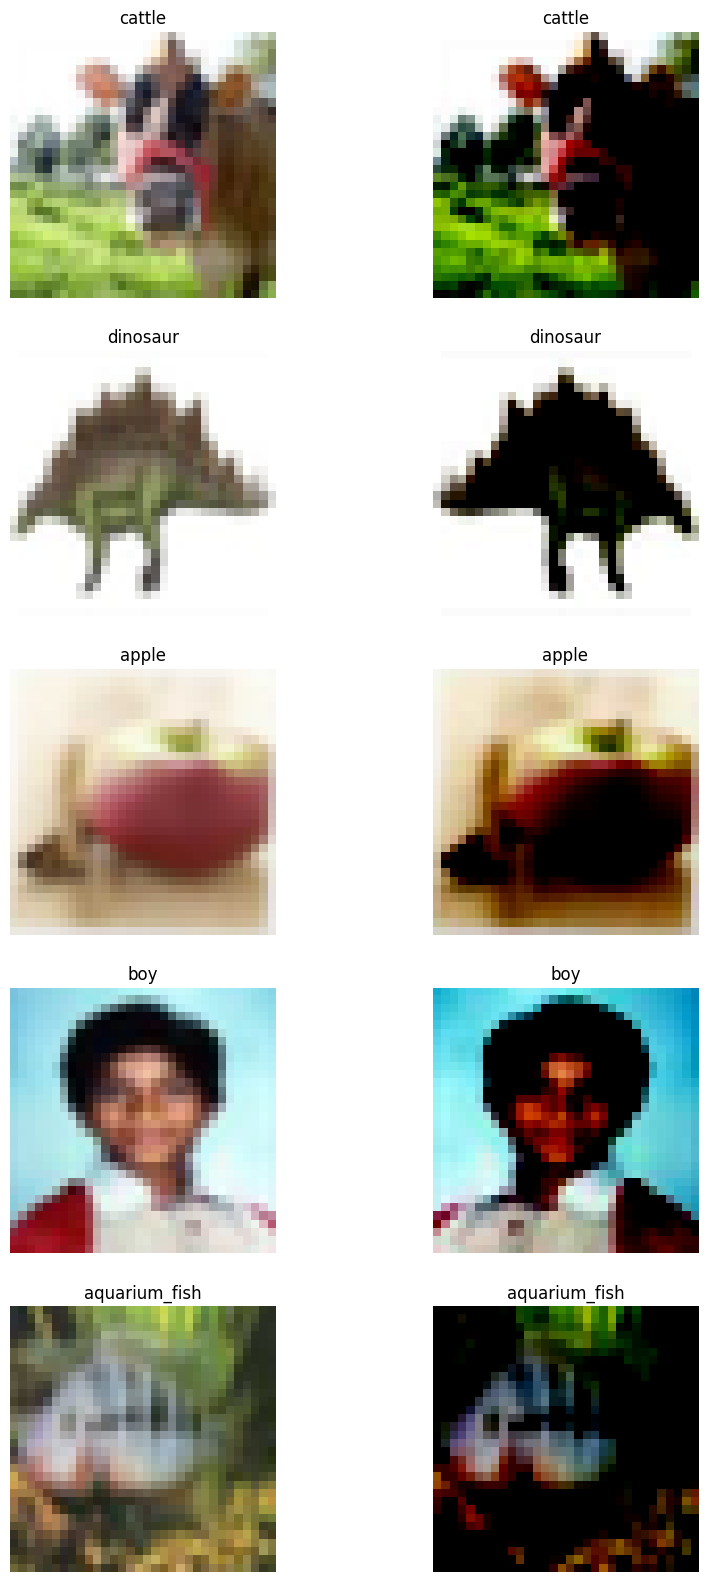

In [7]:
# Verify the number of images in the training dataset
print(f'Number of training images: {len(train_data)}')

# Show the first 5 images with their transformed versions
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i in range(5):
    ax[i][0].imshow(train_data[i][0].permute(1, 2, 0))
    ax[i][0].set_title(dict_ids[train_data[i][1]])
    ax[i][0].axis("off")
    ax[i][1].imshow(train_data[i + len(train_data) // 2][0].permute(1, 2, 0))
    ax[i][1].set_title(dict_ids[train_data[i + len(train_data) // 2][1]])
    ax[i][1].axis("off")
plt.show()